<a href="https://colab.research.google.com/github/akhundMurad/MachineLearning/blob/main/practice/ReutersCategoricalClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reuters News Categorical Classifier

## 1. Preparation.

#### 1.1 Prepare dataset.

In [110]:
from tensorflow.keras.datasets import reuters


(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

word_index = reuters.get_word_index()  # Word to index
reversed_word_index = {index: word for word, index in word_index.items()}  # Index to word

#### 1.2 Vectorize train and test data.

In [111]:
import numpy as np


def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros(shape=(len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#### 1.3 One-hot encoding.

In [112]:
def to_one_hot(labels, dimension=46):
    results = np.zeros(shape=(len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results


one_hot_train_labels = to_one_hot(train_labels)  # tensorflow.keras.utils.to_categorical
one_hot_test_labels = to_one_hot(test_labels)  # tensorflow.keras.utils.to_categorical

## 2. Build model structure.

#### 2.1 Define the model.

In [113]:
from tensorflow import keras
from tensorflow.keras import layers


model = keras.Sequential(
    [
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(46, activation="softmax"),
    ]
)

#### 2.2 Compilation.

In [114]:
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

## 3. Model validation.

#### 3.1 Create validation data.

In [115]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

#### 3.2 Model training.

In [116]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=9,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/9
16/16 [==============================] - 1s 40ms/step - loss: 2.8320 - accuracy: 0.4882 - val_loss: 1.8895 - val_accuracy: 0.6120
Epoch 2/9
16/16 [==============================] - 0s 17ms/step - loss: 1.5709 - accuracy: 0.6744 - val_loss: 1.3954 - val_accuracy: 0.6860
Epoch 3/9
16/16 [==============================] - 0s 16ms/step - loss: 1.1869 - accuracy: 0.7440 - val_loss: 1.2138 - val_accuracy: 0.7370
Epoch 4/9
16/16 [==============================] - 0s 20ms/step - loss: 0.9686 - accuracy: 0.7930 - val_loss: 1.1202 - val_accuracy: 0.7680
Epoch 5/9
16/16 [==============================] - 0s 16ms/step - loss: 0.8092 - accuracy: 0.8261 - val_loss: 1.0211 - val_accuracy: 0.7800
Epoch 6/9
16/16 [==============================] - 0s 17ms/step - loss: 0.6760 - accuracy: 0.8566 - val_loss: 0.9992 - val_accuracy: 0.7900
Epoch 7/9
16/16 [==============================] - 0s 19ms/step - loss: 0.5680 - accuracy: 0.8784 - val_loss: 0.9255 - val_accuracy: 0.8070
Epoch 8/9
16/16 [===

#### 3.3 Training visualization.

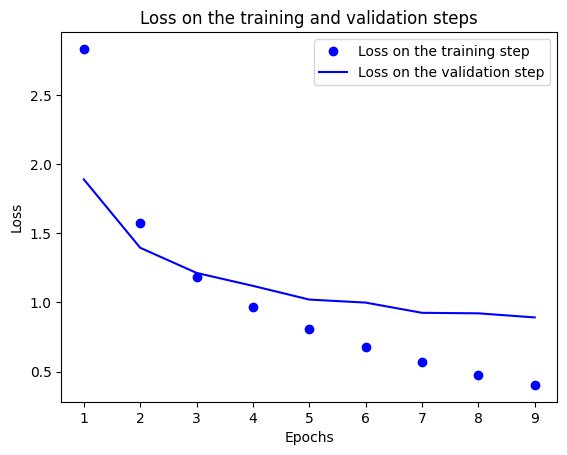

In [117]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Loss on the training step")
plt.plot(epochs, val_loss, "b", label="Loss on the validation step")
plt.title("Loss on the training and validation steps")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

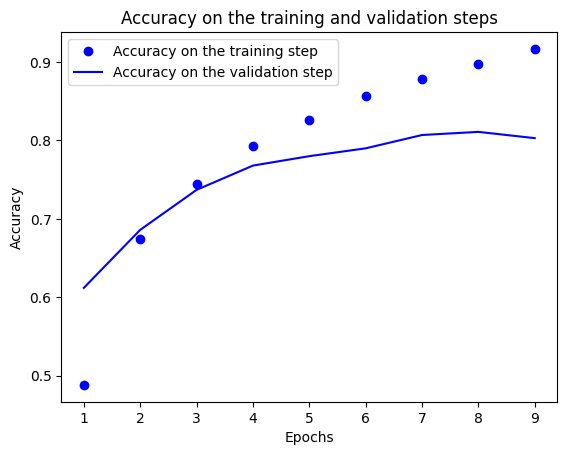

In [118]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, "bo", label="Accuracy on the training step")
plt.plot(epochs, val_acc, "b", label="Accuracy on the validation step")
plt.title("Accuracy on the training and validation steps")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### 3.4 Prediction.

In [123]:
from random import randint


article_words = test_data[randint(0, len(test_data))]
humanized_article = " ".join([reversed_word_index.get(word - 3, "?") for word in article_words])
vecorized_article = vectorize_sequences([article_words])

prediciton = model.predict(vecorized_article)
result_label = np.argmax(prediciton)

print(f"Article text: {humanized_article}\nArticle topic: {result_label}")

1/1 [==============================] - 0s 26ms/step
Article text: ? the indonesian state owned oil company pertamina has found new offshore oil and gas resources in east ? on the western ? of northern sumatra a company spokesman said the spokesman said the discovery was made at the ? ? 1 offshore exploratory well about 38 kms east of ? in ? oil and gas are found in sand ? at the depth of 2 300 metres within the ? formation he said he said preliminary tests showed that the well could flow oil at the rate of 1 320 barrels a day with 50 degrees api at 20 degrees centigrade through a 5 8 inch choke the well also flows natural gas at the rate of 12 mln standard cubic feet a day he added ? ? 1 well located at a water depth of 41 metres was drilled under a production sharing contract between pertamina and ? north sumatra ltd each having 50 pct shares petroleum operations are to be carried out by pertamina as operator through a joint operating body established by the two companies the pertamin